In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.cvtColor(cv2.imread('avatar.jpg'),cv2.COLOR_BGR2GRAY)

Ảnh âm bản

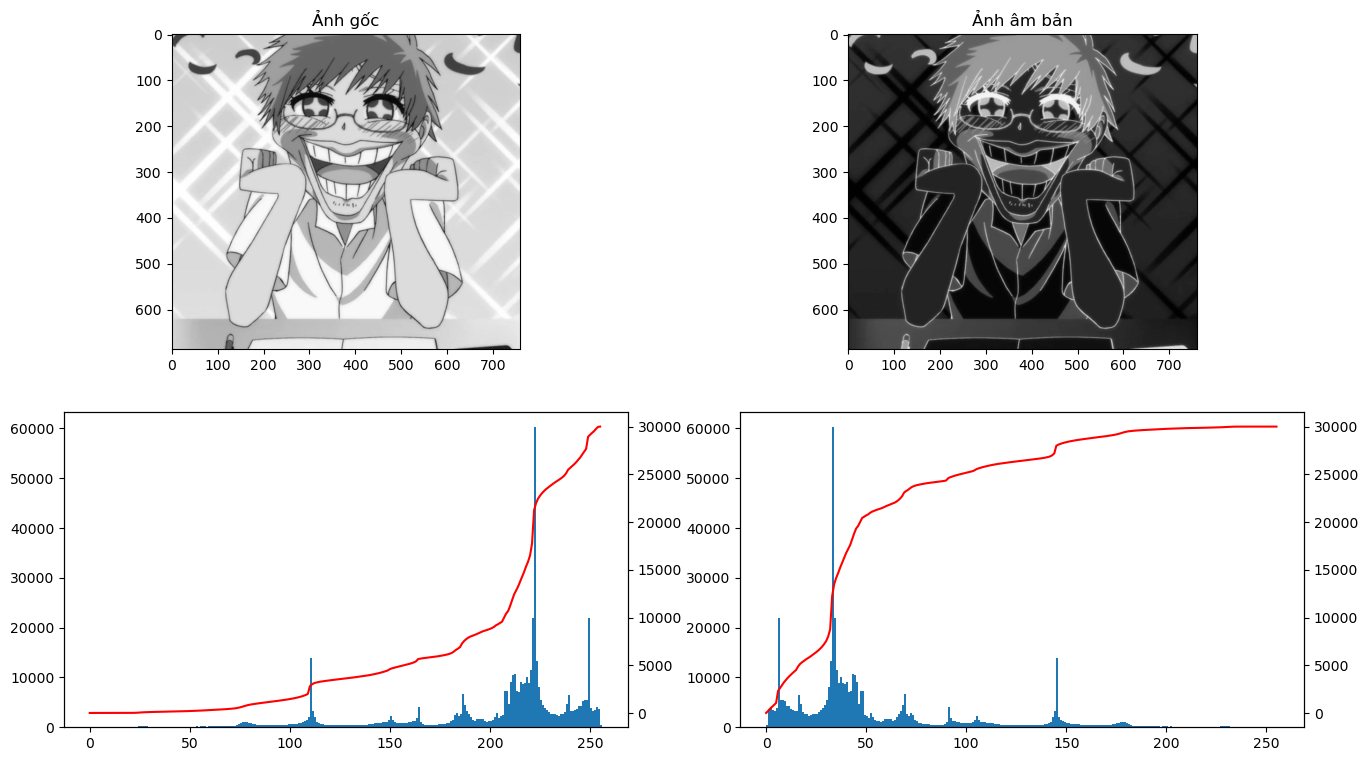

In [2]:
am_ban=255-img
histo, bin_edge = np.histogram(img, bins=np.arange(257))
xs = histo / sum(histo)
histo2, bin_edge2 = np.histogram(am_ban, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
fig=plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)=fig.subplots(2,2)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(am_ban,cmap='gray')
anh2.set_title('Ảnh âm bản')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(am_ban.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')


plt.show()


LẤY NGƯỠNG CỨNG

In [3]:
threshold=int(255/2)
anh_cat=np.copy(img)
anh_cat[anh_cat<=threshold]=0
anh_cat[anh_cat>threshold]=255

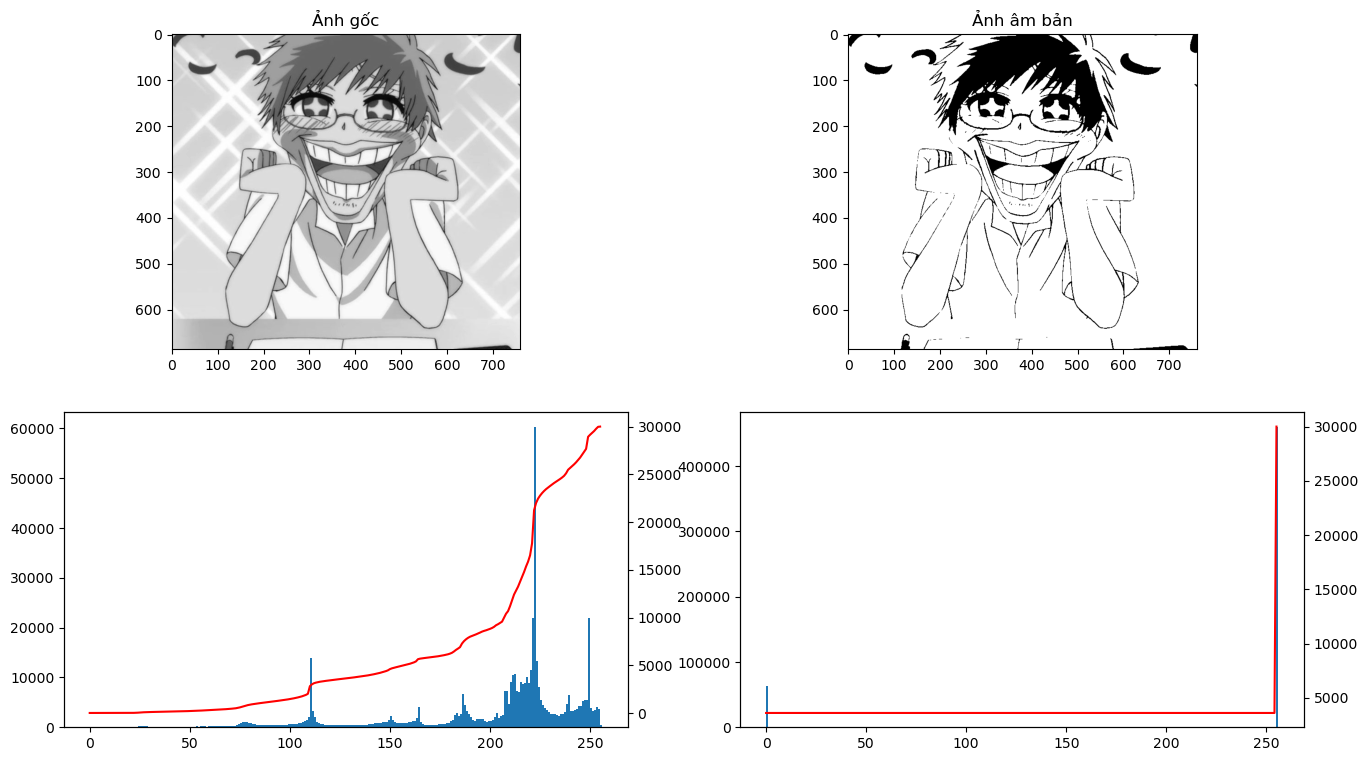

In [4]:
histo, bin_edge = np.histogram(img, bins=np.arange(257))
xs = histo / sum(histo)
histo2, bin_edge2 = np.histogram(anh_cat, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
fig1=plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)= fig1.subplots(2,2)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(anh_cat,cmap='gray')
anh2.set_title('Ảnh lấy ngưỡng cứng')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(anh_cat.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')

Lấy NGƯỠNG TOÀN CỤC

In [5]:
def behonT(img, T):
    lst = []
    for i in img:
        if i < T:
            lst.append(i)
    return lst


def lonhonT(img, T):
    lst = []
    for i in img:
        if i > T:
            lst.append(i)
    return lst


In [6]:
anh_cat1=np.copy(img)
anh_cat1=anh_cat1.reshape(-1,1)
threshold1=int(255/2)
deltaT=0
while True:
    x1 = np.array([behonT(anh_cat1, threshold1)])
    x2 = np.array([lonhonT(anh_cat1, threshold1)])
    deltaT=round((x1.mean()+x2.mean())/2)
    if deltaT==threshold1:
        break
    threshold1=deltaT


In [7]:
threshold1

169

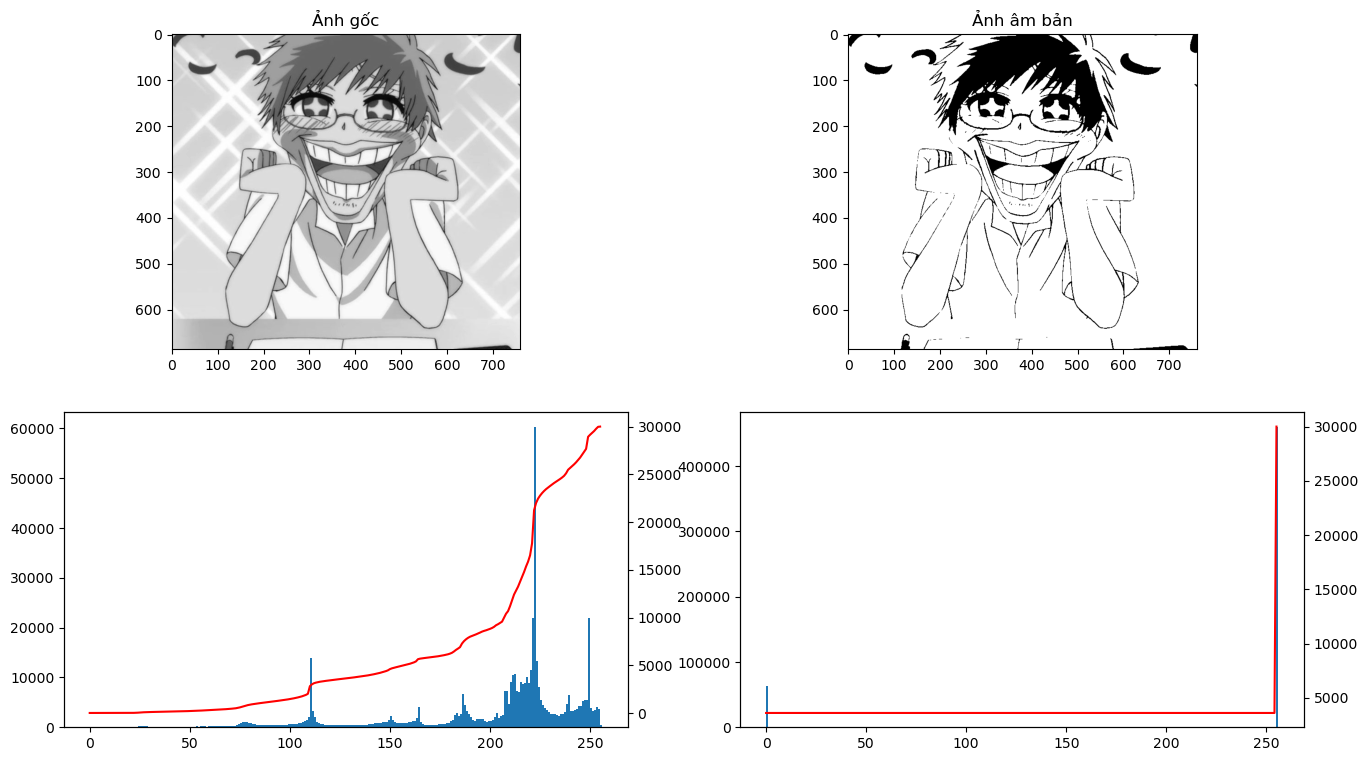

In [8]:
anh_cat1=np.copy(img)
anh_cat1[anh_cat<=threshold1]=0
anh_cat1[anh_cat>threshold1]=255
histo, bin_edge = np.histogram(img, bins=np.arange(257))
xs = histo / sum(histo)
histo2, bin_edge2 = np.histogram(anh_cat1, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
fig2=plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)= fig2.subplots(2,2)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(anh_cat1,cmap='gray')
anh2.set_title('Ảnh cắt ngưỡng toàn cục')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(anh_cat1.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')

LẤY NGƯỠNG TỐI ƯU OTSU

In [9]:
anh_cat2=np.copy(img)
histo2, bin_edge = np.histogram(img, bins=np.arange(256),density=True)
lk=histo2.cumsum()
ut=np.multiply(np.arange(255),histo2)
UT=sum(ut)
ut=ut.cumsum()

In [10]:
lk.shape

(255,)

In [11]:
a=np.subtract(lk*UT,ut)
a=a**2
b=lk*(1-lk)
c=a/b

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10824\2176366249.py:4: RuntimeWarning: invalid value encountered in true_divide
  c=a/b


In [12]:
c=np.nan_to_num(c,nan=0)
t=np.unravel_index(np.argmax(c,axis=0),c.shape[0])

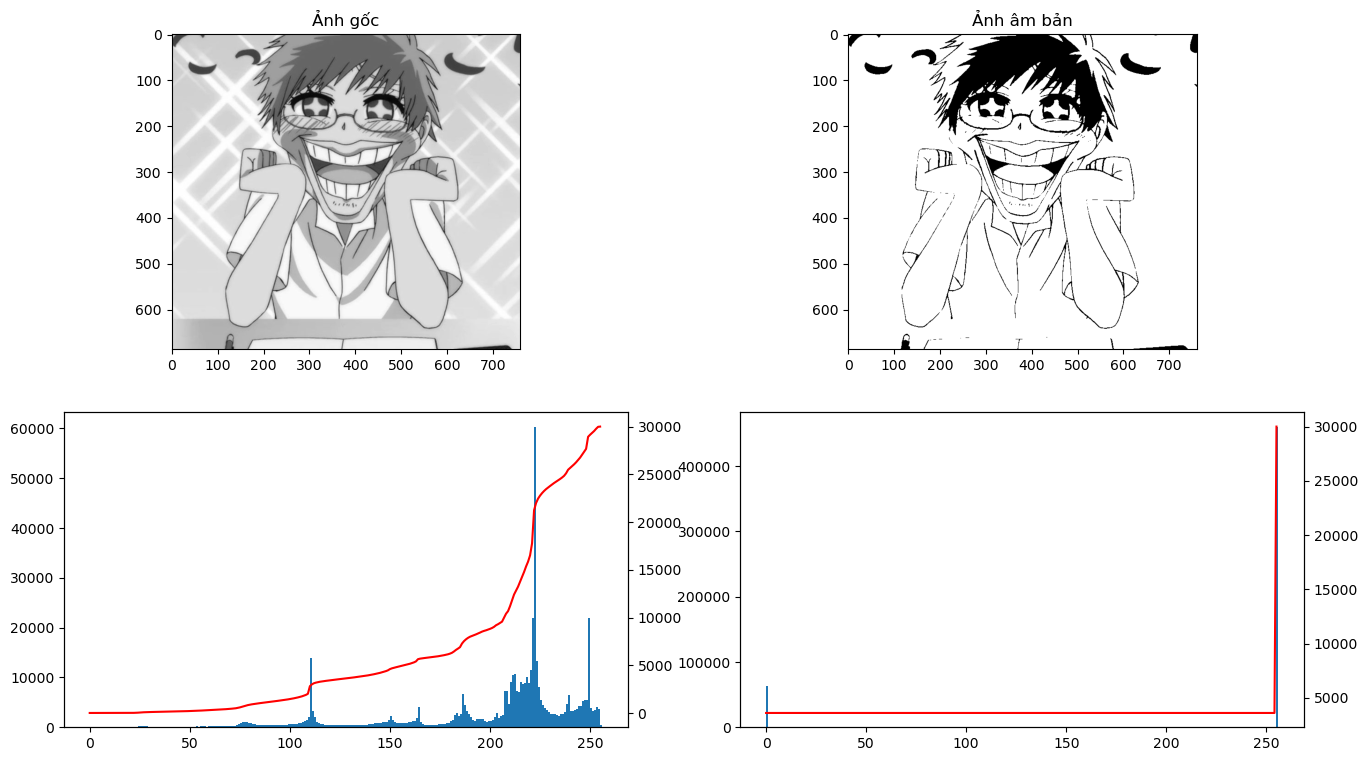

In [13]:
anh_cat2[anh_cat<=t]=0
anh_cat2[anh_cat>t]=255
histo, bin_edge = np.histogram(img, bins=np.arange(257))
xs = histo / sum(histo)
histo2, bin_edge2 = np.histogram(anh_cat2, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
fig3=plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)= fig3.subplots(2,2)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(anh_cat2,cmap='gray')
anh2.set_title('Ảnh cắt ngưỡng OTSU')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(anh_cat2.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')
plt.show()

BIẾN ĐỔI LOGARITH

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10824\4212964608.py:2: RuntimeWarning: divide by zero encountered in log
  anh_log=c*np.log(1+img)


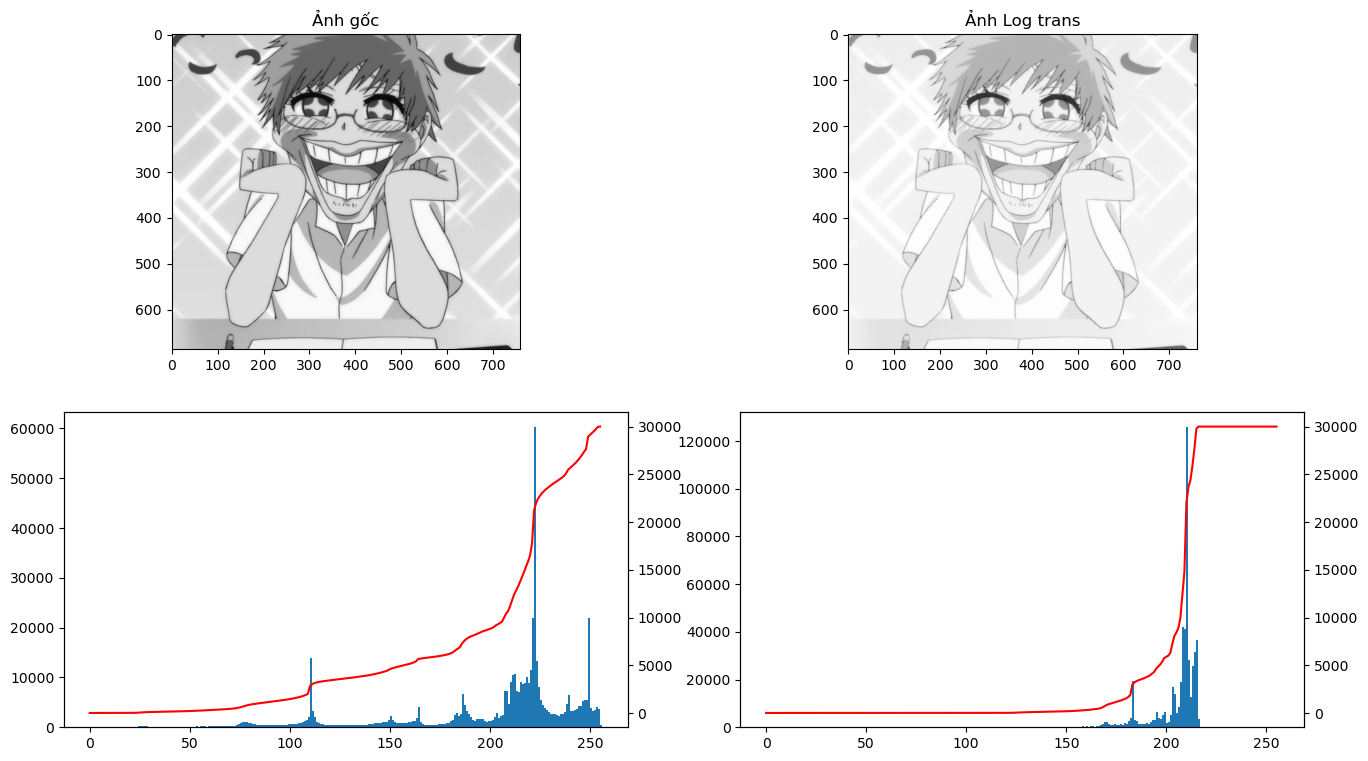

In [17]:
c=255/(1+np.log(1+np.max(img)))
anh_log=c*np.log(1+img)
histo, bin_edge = np.histogram(img, bins=np.arange(257))
xs = histo / sum(histo)
histo2, bin_edge2 = np.histogram(anh_log, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
fig4=plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)=fig4.subplots(2,2)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(anh_log,cmap='gray')
anh2.set_title('Ảnh Log trans')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(anh_log.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')


BIẾN ĐỖI LŨY THỪA

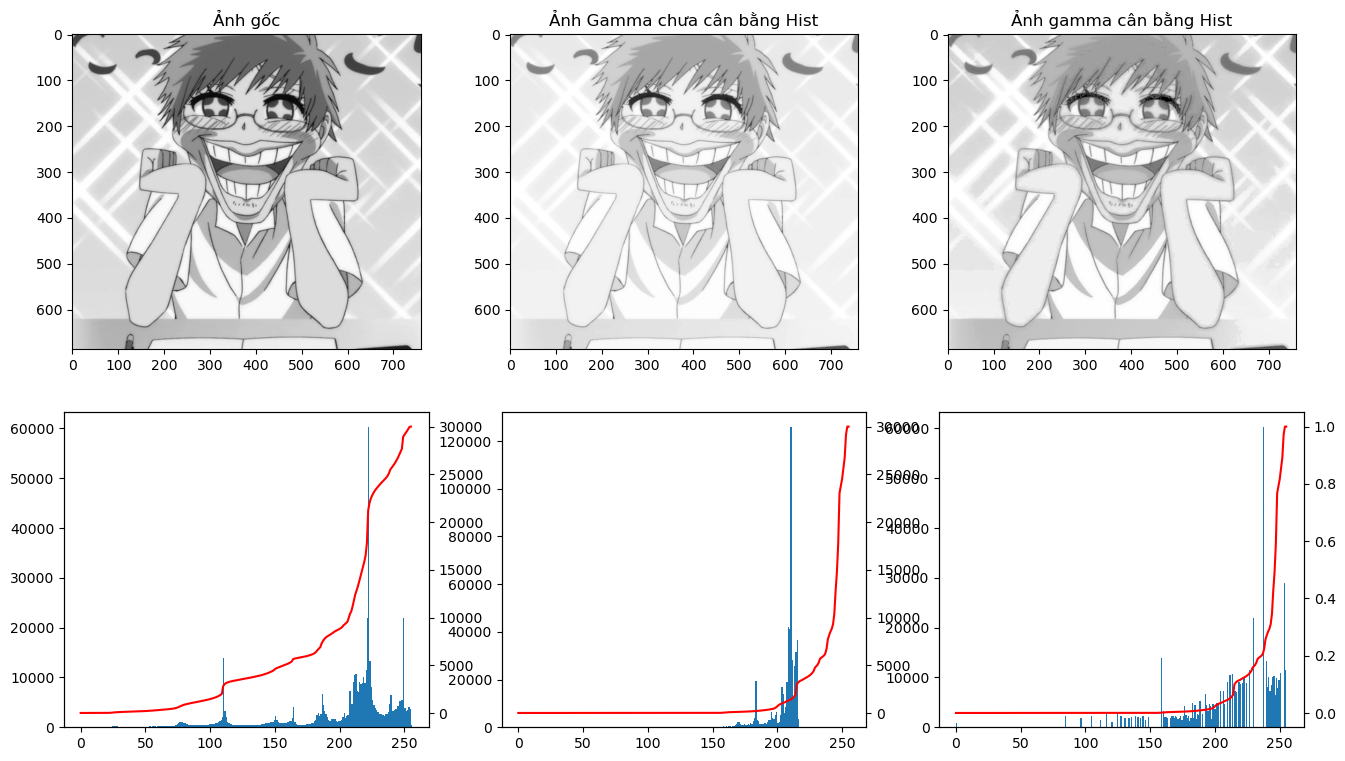

In [19]:
gamma=0.2
c=255/(img.max()**gamma)
anh_gamma=c*img**gamma
anh_gamma2=c*cv2.equalizeHist(img)**gamma
anh_gamma=anh_gamma.astype(np.uint8)
anh_gamma2=anh_gamma2.astype(np.uint8)
histo2, bin_edge2 = np.histogram(anh_gamma, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
histo3, bin_edge3 = np.histogram(anh_gamma, bins=np.arange(257))
xs3 = histo3 / sum(histo3)
fig5=plt.figure(figsize=(16,9))
(anh1,anh2,anh3),(hist1,hist2,hist3)=fig5.subplots(2,3)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(anh_gamma,cmap='gray')
anh2.set_title('Ảnh Gamma chưa cân bằng Hist')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(anh_log.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')
anh3.imshow(anh_gamma2,cmap='gray')
anh3.set_title('Ảnh gamma cân bằng Hist')
hist3.hist(anh_gamma2.ravel(),256,[0,256])
histt=hist3.twinx()
histt.plot(np.arange(256),xs3.cumsum(),color='red')

BIẾN ĐỔI TUYẾN TÍNH

In [20]:
def Piecewise_Linear(img,r1,s1,r2,s2):
    if 0<img and img<=r1:
        return img*s1/r1
    elif r1<img and img<=r2:
        return img*(s2-s1)/(r2-r1)+s1
    else:
        return img*(255-s2)/(255-r2)+s2

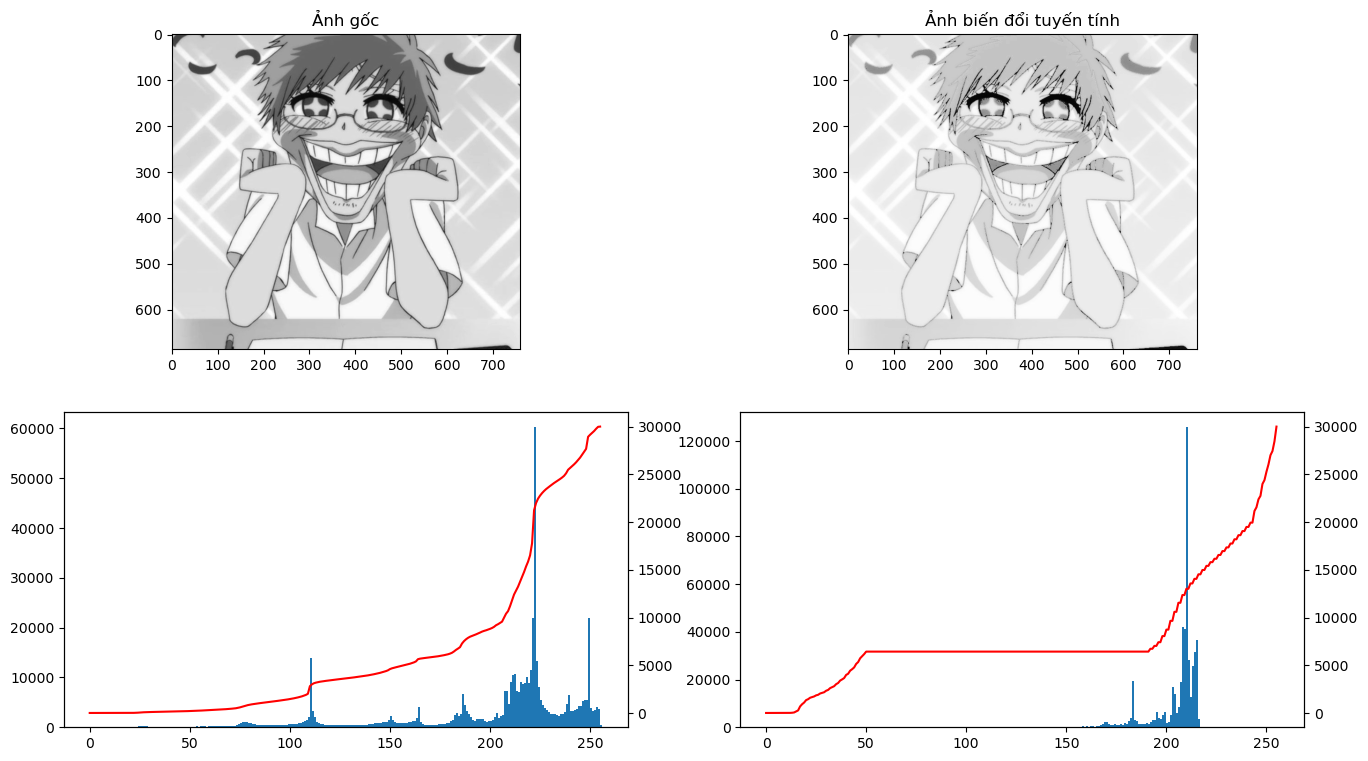

In [25]:
r1=70
s1=50
r2=120
s2=150
Biendoi=np.vectorize(Piecewise_Linear)
anh_tuyentinh=Biendoi(img,r1,s1,r2,s2)
histo2, bin_edge2 = np.histogram(anh_tuyentinh, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
fig6=plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)=fig6.subplots(2,2)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(anh_tuyentinh,cmap='gray')
anh2.set_title('Ảnh biến đổi tuyến tính')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(anh_log.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')

CẮT MẶT PHẲNG

In [46]:
a=0x1b

In [47]:
a>>1

13

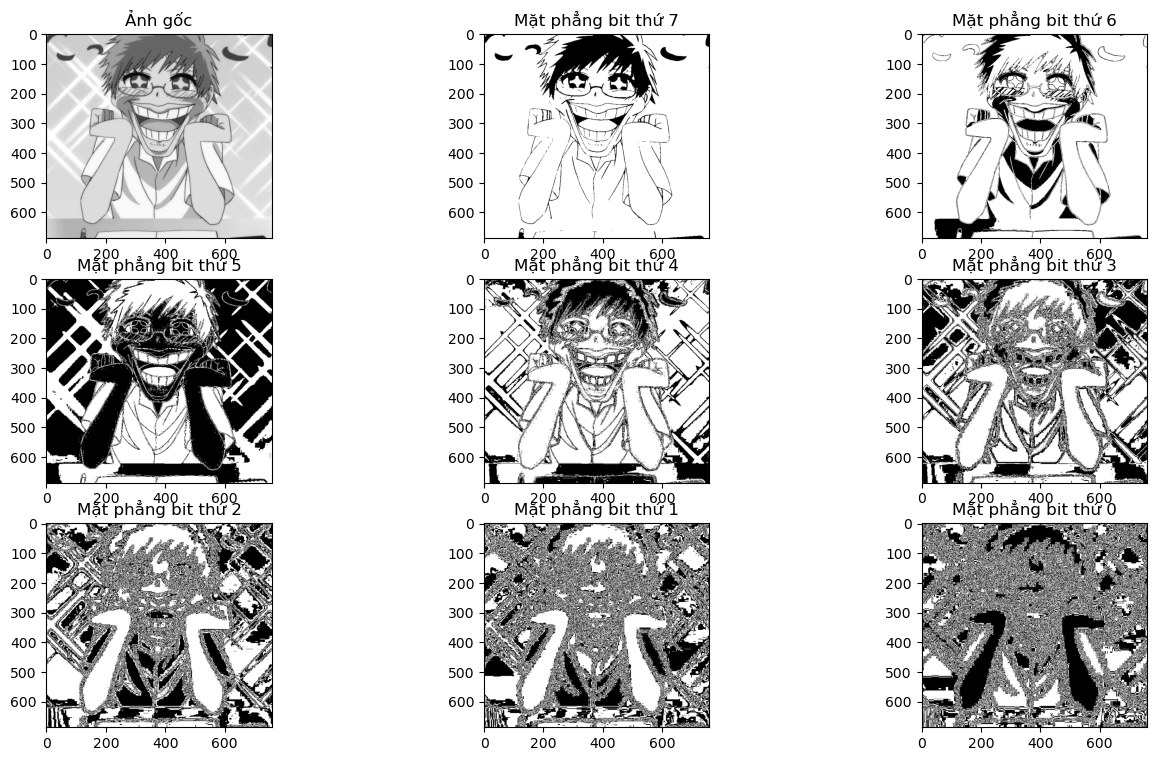

In [64]:
lst=[]
for i in range(8):
    temp=((img>>i)&0x00000001)*255
    lst.append(temp)
figg,anh=plt.subplots(3,3,figsize=(16,9))
anh[0][0].imshow(img,cmap='gray')
anh[0][0].set_title('Ảnh gốc')
m=n=0
for i in range(8):
    n+=1
    if n>2:
        n=0
        m+=1
    anh[m][n].imshow(lst[7-i],cmap='gray')
    anh[m][n].set_title('Mặt phẳng bit thứ '+str(7-i))